## Laboratorio 5 - Data Science

Integrantes:

Jorge Caballeros 20009

Alejandra Guzman 20262

In [13]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cargar el archivo CSV
data = pd.read_csv('train.csv')

# Mostrar las primeras filas del dataset
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:

# Lista básica de stopwords en español
basic_stopwords = [
    "a", "al", "algo", "algunas", "algunos", "ante", "antes", "como", "con", "contra", "cual", "cuando", 
    "de", "del", "desde", "donde", "durante", "e", "el", "ella", "ellas", "ellos", "en", "entre", "era", 
    "erais", "eran", "eras", "eres", "es", "esa", "esas", "ese", "eso", "esos", "esta", "estaba", "estabais", 
    "estaban", "estabas", "estad", "estada", "estadas", "estado", "estados", "estamos", "estando", "estar", 
    "estaremos", "estará", "estarán", "estarás", "estaré", "estaréis", "estaría", "estaríais", "estaríamos", 
    "estarían", "estarías", "estas", "este", "estemos", "esto", "estos", "estoy", "estuve", "estuviera", 
    "estuvierais", "estuvieran", "estuvieras", "estuvieron", "estuviese", "estuvieseis", "estuviesen", 
    "estuvieses", "estuvimos", "estuviste", "estuvisteis", "estuviéramos", "estuviésemos", "estuvo", "está", 
    "estábamos", "estáis", "están", "estás", "esté", "estéis", "estén", "estés", "fue", "fuera", "fuerais", 
    "fueran", "fueras", "fueron", "fuese", "fueseis", "fuesen", "fueses", "fui", "fuimos", "fuiste", "fuisteis", 
    "fuéramos", "fuésemos", "ha", "habida", "habidas", "habido", "habidos", "habiendo", "habremos", "habrá", 
    "habrán", "habrás", "habré", "habréis", "habría", "habríais", "habríamos", "habrían", "habrías", "habéis", 
    "había", "habíais", "habíamos", "habían", "habías", "han", "has", "hasta", "hay", "haya", "hayamos", "hayan", 
    "hayas", "hayáis", "he", "hemos", "hube", "hubiera", "hubierais", "hubieran", "hubieras", "hubieron", 
    "hubiese", "hubieseis", "hubiesen", "hubieses", "hubimos", "hubiste", "hubisteis", "hubiéramos", "hubiésemos", 
    "hubo", "la", "las", "le", "les", "lo", "los", "me", "mi", "mis", "mucho", "muchos", "muy", "más", "mí", 
    "mía", "mías", "mío", "míos", "nada", "ni", "no", "nos", "nosotras", "nosotros", "nuestra", "nuestras", 
    "nuestro", "nuestros", "o", "os", "otra", "otras", "otro", "otros", "para", "pero", "poco", "por", "porque", 
    "que", "quien", "quienes", "qué", "se", "sea", "seamos", "sean", "seas", "sentid", "sentida", "sentidas", 
    "sentido", "sentidos", "seremos", "será", "serán", "serás", "seré", "seréis", "sería", "seríais", "seríamos", 
    "serían", "serías", "seáis", "siente", "sin", "sintiendo", "sobre", "sois", "somos", "son", "soy", "su", 
    "sus", "suya", "suyas", "suyo", "suyos", "sí", "también", "tanto", "te", "tendremos", "tendrá", "tendrán", 
    "tendrás", "tendré", "tendréis", "tendría", "tendríais", "tendríamos", "tendrían", "tendrías", "tened", 
    "tenemos", "tenga", "tengamos", "tengan", "tengas", "tengo", "tengáis", "tenida", "tenidas", "tenido", 
    "tenidos", "teniendo", "tenéis", "tenía", "teníais", "teníamos", "tenían", "tenías", "ti", "tiene", "tienen", 
    "tienes", "todo", "todos", "tu", "tus", "tuve", "tuviera", "tuvierais", "tuvieran", "tuvieras", "tuvieron", 
    "tuviese", "tuvieseis", "tuviesen", "tuvieses", "tuvimos", "tuviste", "tuvisteis", "tuviéramos", "tuviésemos", 
    "tuvo", "tuya", "tuyas", "tuyo", "tuyos", "tú", "un", "una", "uno", "unos", "vosotras", "vosotros", "vuestra", 
    "vuestras", "vuestro", "vuestros", "y", "ya", "yo", "él", "éramos"
]

def clean_text_basic_stopwords(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Quitar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Quitar los caracteres especiales como # o @ y emoticones
    text = re.sub(r'\@\w+|\#\w+', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    
    # Quitar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    



def clean_text_basic_stopwords(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Quitar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Quitar los caracteres especiales como # o @ y emoticones
    text = re.sub(r'\@\w+|\#\w+', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    
    # Quitar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Quitar números
    text = re.sub(r'\d+', '', text)
    
    # Quitar stopwords
    text = ' '.join([word for word in text.split() if word not in basic_stopwords])
    
    return text

# Limpiar todos los tweets con la lista básica de stopwords
data['cleaned_text'] = data['text'].apply(clean_text_basic_stopwords)

# Mostrar algunos tweets limpios
data[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this may allah for...
1,Forest fire near La Ronge Sask. Canada,forest fire near ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive evacuation orders in california
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby as smoke fr...


In [15]:
from collections import Counter

# Separar los textos limpios por categoría (desastre o no desastre)
disaster_texts = ' '.join(data[data['target'] == 1]['cleaned_text'].tolist())
non_disaster_texts = ' '.join(data[data['target'] == 0]['cleaned_text'].tolist())

# Obtener las frecuencias de palabras para cada categoría
disaster_freq = Counter(disaster_texts.split())
non_disaster_freq = Counter(non_disaster_texts.split())

# Obtener las 20 palabras más comunes para cada categoría
top_disaster_words = disaster_freq.most_common(20)
top_non_disaster_words = non_disaster_freq.most_common(20)

top_disaster_words, top_non_disaster_words


([('the', 1358),
  ('in', 1159),
  ('of', 922),
  ('to', 757),
  ('and', 501),
  ('on', 417),
  ('for', 399),
  ('is', 348),
  ('i', 321),
  ('at', 305),
  ('by', 275),
  ('from', 244),
  ('with', 192),
  ('that', 185),
  ('this', 181),
  ('after', 181),
  ('fire', 177),
  ('it', 176),
  ('was', 168),
  ('as', 167)],
 [('the', 1903),
  ('to', 1188),
  ('i', 1076),
  ('and', 917),
  ('of', 901),
  ('in', 817),
  ('you', 664),
  ('is', 595),
  ('my', 544),
  ('for', 491),
  ('on', 436),
  ('it', 391),
  ('with', 380),
  ('that', 376),
  ('this', 296),
  ('be', 288),
  ('like', 253),
  ('by', 244),
  ('im', 243),
  ('have', 242)])

Es evidente que muchas palabras comunes, como "the", "in", "of", y "to", aparecen en ambas listas. Estas palabras, a pesar de ser frecuentes, pueden no ser muy útiles para la clasificación, ya que aparecen tanto en tweets de desastres como en tweets que no lo son. Sin embargo, palabras como "fire" y "after" podrían ser indicativas de un desastre.

In [16]:
def get_ngrams(text, n):
    tokens = text.split()
    return list(ngrams(tokens, n))

disaster_bigrams = get_ngrams(disaster_texts, 2)
non_disaster_bigrams = get_ngrams(non_disaster_texts, 2)

disaster_trigrams = get_ngrams(disaster_texts, 3)
non_disaster_trigrams = get_ngrams(non_disaster_texts, 3)

# Obtener las frecuencias de bigramas y trigramas
disaster_bigram_freq = Counter(disaster_bigrams)
non_disaster_bigram_freq = Counter(non_disaster_bigrams)

disaster_trigram_freq = Counter(disaster_trigrams)
non_disaster_trigram_freq = Counter(non_disaster_trigrams)

# Obtener los 20 bigramas y trigramas más comunes para cada categoría
top_disaster_bigrams = disaster_bigram_freq.most_common(20)
top_non_disaster_bigrams = non_disaster_bigram_freq.most_common(20)

top_disaster_trigrams = disaster_trigram_freq.most_common(20)
top_non_disaster_trigrams = non_disaster_trigram_freq.most_common(20)

top_disaster_bigrams, top_non_disaster_bigrams, top_disaster_trigrams, top_non_disaster_trigrams

([(('in', 'the'), 144),
  (('of', 'the'), 118),
  (('suicide', 'bomber'), 59),
  (('on', 'the'), 53),
  (('at', 'the'), 43),
  (('more', 'than'), 43),
  (('have', 'been'), 42),
  (('northern', 'california'), 41),
  (('by', 'the'), 41),
  (('and', 'the'), 38),
  (('oil', 'spill'), 38),
  (('killed', 'in'), 37),
  (('to', 'the'), 37),
  (('the', 'latest'), 36),
  (('the', 'fatal'), 36),
  (('to', 'be'), 35),
  (('for', 'the'), 34),
  (('suicide', 'bombing'), 34),
  (('from', 'mh'), 34),
  (('on', 'fire'), 33)],
 [(('in', 'the'), 165),
  (('of', 'the'), 138),
  (('to', 'the'), 91),
  (('on', 'the'), 82),
  (('to', 'be'), 73),
  (('for', 'the'), 64),
  (('i', 'just'), 55),
  (('is', 'the'), 48),
  (('going', 'to'), 48),
  (('if', 'you'), 48),
  (('at', 'the'), 43),
  (('i', 'have'), 43),
  (('i', 'dont'), 43),
  (('and', 'the'), 41),
  (('and', 'i'), 41),
  (('want', 'to'), 39),
  (('you', 'are'), 38),
  (('will', 'be'), 38),
  (('cross', 'body'), 38),
  (('in', 'my'), 36)],
 [(('northern'

Los bigramas y trigramas pueden considerarse utiles en terminos de contexto. Considerar estos en un modelo de clasificacion puede mejorar la capacidad de capturar y entender el contexto; lo cual por ende mejoraria el rendimiento.

## 5. Analisis Exploratorio de los datos

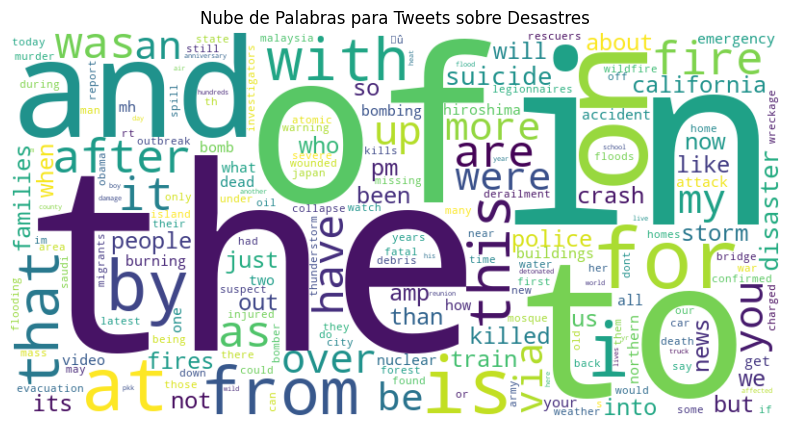

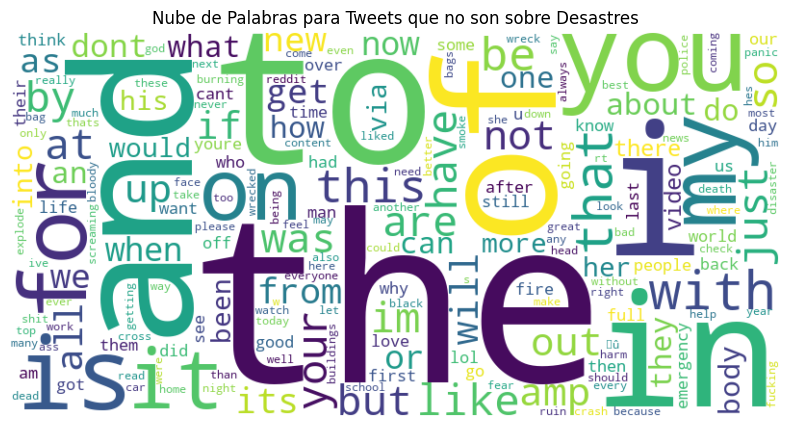

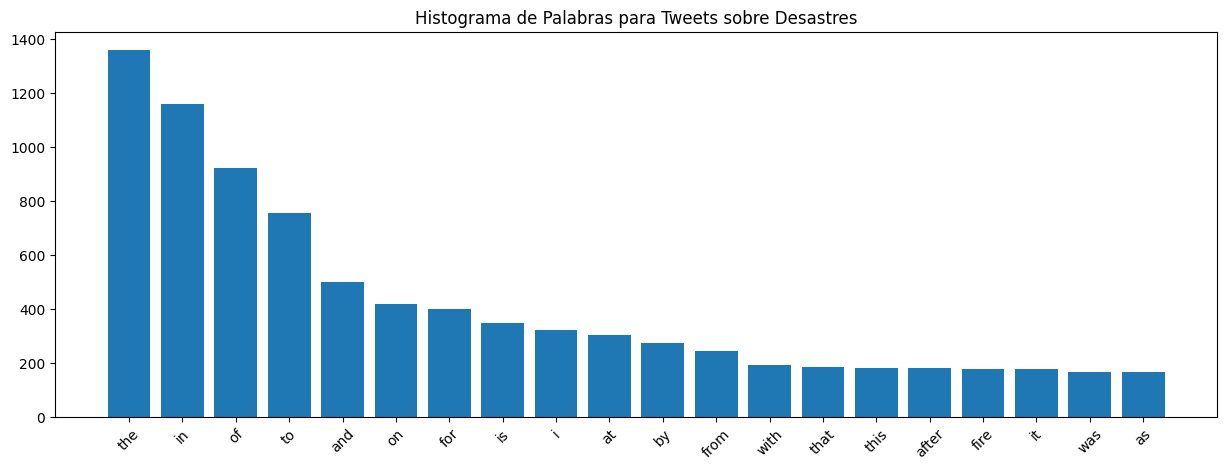

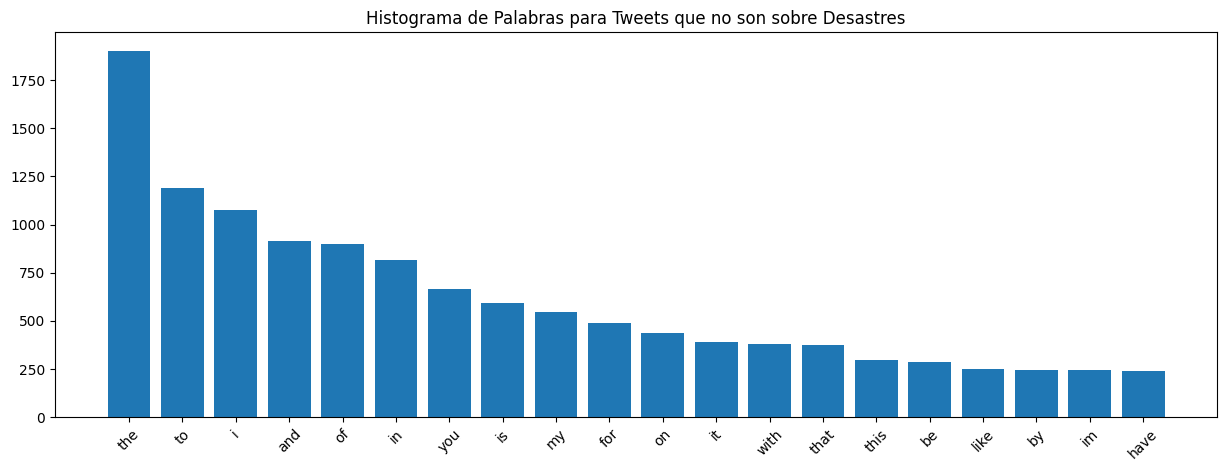

In [17]:
def generate_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Función para generar un histograma
def generate_histogram(freq_list, title):
    words = [word[0] for word in freq_list]
    frequencies = [word[1] for word in freq_list]
    
    plt.figure(figsize=(15, 5))
    plt.bar(words, frequencies)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

# Generar nube de palabras para tweets de desastres
generate_wordcloud(disaster_freq, "Nube de Palabras para Tweets sobre Desastres")

# Generar nube de palabras para tweets que no son de desastres
generate_wordcloud(non_disaster_freq, "Nube de Palabras para Tweets que no son sobre Desastres")

# Generar histograma para las 20 palabras más frecuentes en tweets de desastres
generate_histogram(top_disaster_words, "Histograma de Palabras para Tweets sobre Desastres")

# Generar histograma para las 20 palabras más frecuentes en tweets que no son de desastres
generate_histogram(top_non_disaster_words, "Histograma de Palabras para Tweets que no son sobre Desastres")

En los tweets sobre desastres, palabras como "the", "in" y "of" son las más repetidas, aunque estas palabras por sí solas no son particularmente indicativas de un desastre. En los tweets que no son sobre desastres, también vemos palabras comunes como "the", "to" e "i". 

In [18]:
from collections import Counter
import pandas as pd

# Cargar los datos
data = pd.read_csv('train.csv')
# Separar los textos entre aquellos que están etiquetados como desastres y aquellos que no lo están
disaster_texts = data[data["target"] == 1]["text"]
non_disaster_texts = data[data["target"] == 0]["text"]

# Tokenización y conteo de frecuencias
disaster_tokens = [word for text in disaster_texts for word in text.split()]
non_disaster_tokens = [word for text in non_disaster_texts for word in text.split()]

disaster_freq = Counter(disaster_tokens)
non_disaster_freq = Counter(non_disaster_tokens)

# Definición de listas básicas de palabras positivas, negativas y neutras
positive_words = ["happy", "joy", "love", "great", "good", "amazing", "fantastic", "positive", "best", "win", "success"]
negative_words = ["sad", "hate", "bad", "horrible", "negative", "loss", "fail", "worst", "pain", "fear", "disaster"]
neutral_words = ["the", "and", "is", "of", "in", "to", "it", "for", "on", "that", "with"]

# Comprobar la presencia de estas palabras en nuestros datos
positive_in_disaster = sum([disaster_freq[word] for word in positive_words if word in disaster_freq])
negative_in_disaster = sum([disaster_freq[word] for word in negative_words if word in disaster_freq])
neutral_in_disaster = sum([disaster_freq[word] for word in neutral_words if word in disaster_freq])

positive_in_non_disaster = sum([non_disaster_freq[word] for word in positive_words if word in non_disaster_freq])
negative_in_non_disaster = sum([non_disaster_freq[word] for word in negative_words if word in non_disaster_freq])
neutral_in_non_disaster = sum([non_disaster_freq[word] for word in neutral_words if word in non_disaster_freq])

results = {
    "positive_in_disaster": positive_in_disaster,
    "negative_in_disaster": negative_in_disaster,
    "neutral_in_disaster": neutral_in_disaster,
    "positive_in_non_disaster": positive_in_non_disaster,
    "negative_in_non_disaster": negative_in_non_disaster,
    "neutral_in_non_disaster": neutral_in_non_disaster
}

print(results)

{'positive_in_disaster': 38, 'negative_in_disaster': 109, 'neutral_in_disaster': 5668, 'positive_in_non_disaster': 194, 'negative_in_non_disaster': 138, 'neutral_in_non_disaster': 7333}


En los tweets relacionados con desastres, las palabras con connotación positiva aparecen 38 veces, mientras que las palabras negativas aparecen 109 veces. Esto es esperado, ya que uno anticiparía que los mensajes sobre desastres tengan un tono más negativo dada la naturaleza del tema.

En contraste, en los tweets que no están relacionados con desastres, las palabras positivas aparecen 194 veces, lo que es significativamente más alto que en los tweets de desastres. Las palabras negativas también están presentes pero solo 138 veces, lo que sugiere un balance más equilibrado entre las connotaciones en este conjunto.

Como era de esperar, las palabras neutras dominan ambos conjuntos, con 5668 apariciones en los tweets de desastres y 7333 en los no desastres. Estas palabras son comunes en la estructura lingüística y no aportan un sentimiento específico al mensaje.

# Determinacion de la tonalidad de un tweet:

Para determinar el tono general de un tweet basado en la cantidad de palabras positivas y negativas, podemos usar el siguiente criterio:

**Predominantemente Positivo:** Si la cantidad de palabras positivas en el tweet supera significativamente a las negativas, podemos clasificar el tweet como predominantemente positivo. Esto sugiere que el mensaje transmite principalmente sentimientos o perspectivas optimistas.

**Predominantemente Negativo:** De manera similar, si las palabras negativas son más numerosas que las positivas, el tweet se puede considerar predominantemente negativo. Esto indica que el mensaje tiene un tono más pesimista o preocupante.

**Neutral o Mixto:** Si la cantidad de palabras positivas y negativas es similar, o si ambas son mínimas en comparación con el total de palabras del tweet, entonces el mensaje es neutral o mixto. Esto significa que el tweet no se inclina fuertemente hacia un sentimiento positivo o negativo, o que presenta una combinación equilibrada de ambos.

Es importante señalar que este método es una aproximación. La verdadera naturaleza del sentimiento en un texto a menudo requiere una consideración más detallada del contexto, las frases completas y las intenciones del autor. Sin embargo, este criterio proporciona una manera rápida y sencilla de clasificar el tono general de un tweet basado en la presencia de palabras con sentimiento.

In [19]:
def classify_sentiment(tweet_tokens):
    positive_count = sum([1 for word in tweet_tokens if word in positive_words])
    negative_count = sum([1 for word in tweet_tokens if word in negative_words])
    
    if positive_count > negative_count:
        return "Predominantemente Positivo"
    elif negative_count > positive_count:
        return "Predominantemente Negativo"
    else:
        return "Neutral o Mixto"

# Tokenización de todos los tweets
data["tokens"] = data["text"].apply(lambda x: x.split())

# Aplicar la clasificación a cada tweet
data["sentiment_classification"] = data["tokens"].apply(classify_sentiment)

# Mostrar los primeros resultados
data[["text", "sentiment_classification"]].head()


,text,sentiment_classification
0,Our Deeds are the Reason of this #earthquake M...,Neutral o Mixto
1,Forest fire near La Ronge Sask. Canada,Neutral o Mixto
2,All residents asked to 'shelter in place' are ...,Neutral o Mixto
3,"13,000 people receive #wildfires evacuation or...",Neutral o Mixto
4,Just got sent this photo from Ruby #Alaska as ...,Neutral o Mixto


#### 7.1 ¿Cuáles son los 10 tweets más negativos?¿En qué categoría están? 

In [20]:
# Filtering the most negative tweets
most_negative_tweets = data[data["sentiment_classification"] == "Predominantemente Negativo"]

# Sorting the tweets by the difference between negative and positive word counts to get the most negative ones
most_negative_tweets["negative_difference"] = most_negative_tweets["tokens"].apply(lambda x: sum([1 for word in x if word in negative_words]) - sum([1 for word in x if word in positive_words]))
sorted_most_negative_tweets = most_negative_tweets.sort_values(by="negative_difference", ascending=False).head(10)

# Display the 10 most negative tweets and their categories (target column)
sorted_most_negative_tweets[["text", "target"]]


C:\Users\jorge\AppData\Local\Temp\ipykernel_3816\3326285275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_negative_tweets["negative_difference"] = most_negative_tweets["tokens"].apply(lambda x: sum([1 for word in x if word in negative_words]) - sum([1 for word in x if word in positive_words]))


,text,target
5232,There are no four truths-of pain of desire tha...,0
5067,Suncorp net profit rises to $1.13 billion in w...,1
5063,natural disaster ÛÒ News Stories About natura...,1
81,I was in a horrible car accident this past Sun...,1
5103,Any disaster impairs mental health especially ...,1
5081,beforeitsnews : 3 former executives to be pros...,1
5087,Physical sense helps preserve memories of 2011...,1
5089,@DalaiLama then have the biggest nuclear disas...,1
5091,3 former executives to be prosecuted in Fukush...,1
5093,3 former executives to be prosecuted in Fukush...,1




| Número | Texto del Tweet | Categoría |
|--------|-----------------|-----------|
| 5232   | There are no four truths-of pain of desire tha... | 0 |
| 5067   | Suncorp net profit rises to $1.13 billion in w... | 1 |
| 5063   | natural disaster ÛÒ News Stories About natura... | 1 |
| 81     | I was in a horrible car accident this past Sun... | 1 |
| 5103   | Any disaster impairs mental health especially ... | 1 |
| 5081   | beforeitsnews : 3 former executives to be pros... | 1 |
| 5087   | Physical sense helps preserve memories of 2011... | 1 |
| 5089   | @DalaiLama then have the biggest nuclear disas... | 1 |
| 5091   | 3 former executives to be prosecuted in Fukush... | 1 |
| 5093   | 3 former executives to be prosecuted in Fukush... | 1 |


#### 7.2 ¿Cuáles son los 10 tweets más positivos?¿En qué categoría están? 

In [21]:
# Filtering the most positive tweets
most_positive_tweets = data[data["sentiment_classification"] == "Predominantemente Positivo"]

# Sorting the tweets by the difference between positive and negative word counts to get the most positive ones
most_positive_tweets["positive_difference"] = most_positive_tweets["tokens"].apply(lambda x: sum([1 for word in x if word in positive_words]) - sum([1 for word in x if word in negative_words]))
sorted_most_positive_tweets = most_positive_tweets.sort_values(by="positive_difference", ascending=False).head(10)

# Displaying the 10 most positive tweets and their categories
sorted_most_positive_tweets[["text", "target"]]


C:\Users\jorge\AppData\Local\Temp\ipykernel_3816\4266513409.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_positive_tweets["positive_difference"] = most_positive_tweets["tokens"].apply(lambda x: sum([1 for word in x if word in positive_words]) - sum([1 for word in x if word in negative_words]))


,text,target
6435,@JewhadiTM It is almost amazing to think someo...,1
6149,Look at them'@Ayhoka_: Co happy bn too long'@F...,0
4710,@Morning_Joe @Reince @PressSec Joe ur so smart...,0
7267,@DrMartyFox In the U.S. government and Lib...,0
1880,do he love me do he love me not I ain't a play...,0
1856,Love love love do you remember your first crus...,0
5074,Hello natural hazards/disaster recovery &amp; ...,0
7237,@eyecuts @Erasuterism I love 96 Gal Deco to de...,1
5169,@Gargron good sir I did not wish to but now I ...,0
5168,Dc I love you but please obliterate power girl,0




| Número | Texto del Tweet | Categoría |
|--------|-----------------|-----------|
| 6435   | @JewhadiTM It is almost amazing to think someo... | 1 |
| 6149   | Look at them'@Ayhoka_: Co happy bn too long'@F... | 0 |
| 4710   | @Morning_Joe @Reince @PressSec Joe ur so smart... | 0 |
| 7267   | @DrMartyFox     In the U.S. government and Lib... | 0 |
| 1880   | do he love me do he love me not I ain't a play... | 0 |
| 1856   | Love love love do you remember your first crus... | 0 |
| 5074   | Hello natural hazards/disaster recovery &amp; ... | 0 |
| 7237   | @eyecuts @Erasuterism I love 96 Gal Deco to de... | 1 |
| 5169   | @Gargron good sir I did not wish to but now I ... | 0 |
| 5168   | Dc I love you but please obliterate power girl  | 0 |



### 7.3

Los tweets sobre desastres reales (categoría 1) tienen en promedio menos palabras positivas y más palabras negativas que aquellos que no son sobre desastres (categoría 0).
Esto sugiere que los tweets relacionados con desastres son, en general, más negativos en tono en comparación con los tweets que no abordan desastres. Esta tendencia es coherente con la naturaleza seria de los eventos de desastre.

### 8.Cree una variable que contenga la “negatividad” de cada tweet. Inclúyala en el conjunto dedatos y entrene nuevamente el modelo de clasificación de la hoja pasada. ¿La inclusión de esta variable mejoró los resultados del modelo de clasificación?

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import scipy as sp

# Load data
data = pd.read_csv('train.csv')

# Tokenize the texts
data["tokens"] = data["text"].apply(lambda x: x.split())

# Calculate positive and negative word counts
data["positive_count"] = data["tokens"].apply(lambda x: sum([1 for word in x if word in positive_words]))
data["negative_count"] = data["tokens"].apply(lambda x: sum([1 for word in x if word in negative_words]))

# Create the 'negativity' column
data["negativity"] = data["negative_count"] - data["positive_count"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["text", "negativity"]], data["target"], test_size=0.2, random_state=42)

# Applying TF-IDF transformation to the texts
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train["text"])
X_test_tfidf = vectorizer.transform(X_test["text"])

# Adding the 'negativity' feature
X_train_combined = sp.sparse.hstack((X_train_tfidf, X_train[["negativity"]].values), format='csr')
X_test_combined = sp.sparse.hstack((X_test_tfidf, X_test[["negativity"]].values), format='csr')

# Training the original model (without 'negativity')
clf_original = LogisticRegression(max_iter=1000)
clf_original.fit(X_train_tfidf, y_train)
y_pred_original = clf_original.predict(X_test_tfidf)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Training the model with 'negativity' included
clf_combined = LogisticRegression(max_iter=1000)
clf_combined.fit(X_train_combined, y_train)
y_pred_combined = clf_combined.predict(X_test_combined)
accuracy_combined = accuracy_score(y_test, y_pred_combined)

print("Accuracy without 'negativity':", accuracy_original)
print("Accuracy with 'negativity':", accuracy_combined)


Accuracy without 'negativity': 0.7997373604727511
Accuracy with 'negativity': 0.8010505581089954


La inclusión de la variable negativity mejoró los resultados de la clasificación pero la diferenci de usarla o no es insignificante.